<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Walt9819/blob/main/Week7/RegresionesyKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

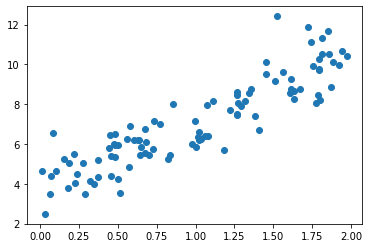

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [6]:
#X_fit[]

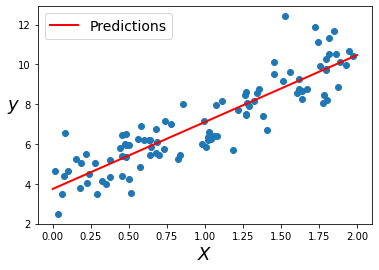

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [12]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [13]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

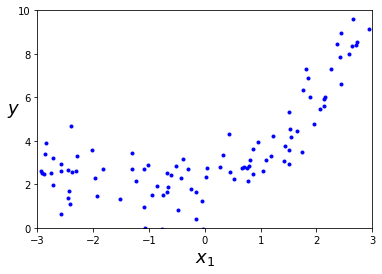

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [18]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [19]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [20]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

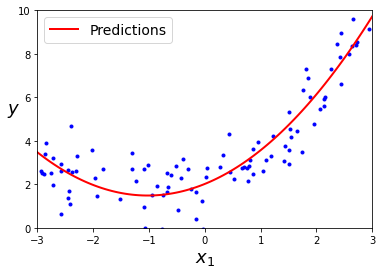

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [23]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [24]:
len(X)

1000

In [25]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

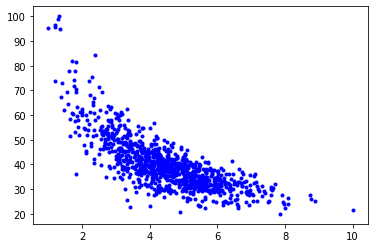

In [26]:
plt.plot(X,y,'b.')

In [42]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = X_test.shape[0]/X_train.shape[0], random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Numero total de registros en el validation set: {len(X_val)}')
print(f'Tamaño de X_val: {X_val.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 800
Tamaño de X_train: (800, 1)
**************************************************
Numero total de registros en el validation set: 100
Tamaño de X_val: (100, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


##### Lineal model
Equation:

$\hat{Y} = \beta_0 + \beta_1 X$

Predicted cost = intercept + coefficient * number of units


In [43]:
# Lineal
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)
print(f"Equation: Cost = {lin_reg.intercept_:.3f} + {lin_reg.coef_[0]:.3f} * units")

y_pred = lin_reg.predict(X_train) # Save predictions

Equation: Cost = 66.961 + -6.035 * units


In [44]:
# Plot the prediction for at least the minimum and maximum value in X_train
def plot_prediction(X_train, y_train, lin_reg):
  X_new = np.linspace(X_train.min()[0]-1, X_train.max()[0]+1, 100).reshape(100, 1)
  y_new = lin_reg.predict(X_new)
  plt.plot(X_train, y_train, "b.") # Plot data
  plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions") # Plot linear predictions
  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.legend(fontsize=14)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


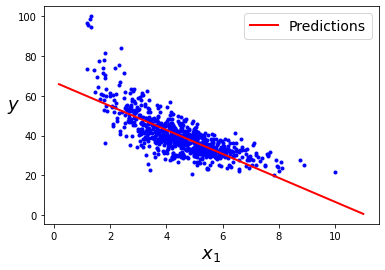

In [45]:
plot_prediction(X_train, y_train, lin_reg) # Predictions over training set

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


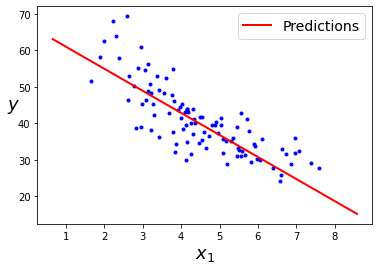

In [46]:
plot_prediction(X_val, y_val, lin_reg) # Predictions over validation set

In [37]:
from sklearn import metrics
from sklearn.metrics import r2_score

def print_metrics(y_train, y_pred):
  print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
  print('r2_score',r2_score(y_train, y_pred))

In [47]:
print_metrics(y_train, y_pred) # Predictions for training set

Error medio Absoluto (MAE): 4.969469710155378
Root Mean Squared Error: 6.969298290853993
r2_score 0.5686570337323267


In [49]:
print_metrics(y_val, lin_reg.predict(X_val)) # Predictions for validation set

Error medio Absoluto (MAE): 4.437241981496316
Root Mean Squared Error: 5.76152640533818
r2_score 0.6303166314712352


#### Conclusiones modelo lineal
En este caso el ajuste de un modelo lineal tiene una tendencia al underfitting, es decir, que la complejidad del modelo que se intenta modelar es mayor que la del modelo que estamos ajustando. Esto se nota claramente en la figura donde se grafican los datos originales y la predicción; de igual manera queda corroborado con el valor de la $R^2$, la cual apenas es de un 0.57 para el conjunto de training, mientras que para el de validation pareciera incrementar hasta un 0.63.

#### Polinomial model

In [126]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

# Polinomial class for variable degree
class PolyFit():
  def __init__(self, X, y, degree):
    self._degree = degree
    self._poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    self.X = X
    self.y = y
    self.model = LinearRegression(fit_intercept=True)
    # Train model
    self._fit()

  def _fit(self):
    X_poly = self._poly_features.fit_transform(self.X)
    self.model.fit(X_poly, self.y)

  def plotPrediction(self, X=None, y=None):
    if type(X) == type(None) or type(y) == type(None):
      X = self.X
      y = self.y
    X_new = np.linspace(X.min()-1, X.max()+1, 100).reshape(100, 1)
    X_new_poly = self._poly_features.fit_transform(X_new)
    y_new = self.model.predict(X_new_poly)
    plt.plot(X, y, "b.") # Plot data
    plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions") # Plot linear predictions
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

  def print_metrics(self, X=None, y=None):
    if type(X) == type(None) or type(y) == type(None):
      X = self.X
      y = self.y
    X_poly = self._poly_features.fit_transform(X)
    y_pred = self.model.predict(X_poly)
    print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
    print('r2_score',r2_score(y, y_pred))

  def print_equation(self):
    print(f"Equation: y_hat = {self.model.intercept_:.2f} + {' + '.join([f'{self.model.coef_[i-1]:.2f} X^{i}' for i in range(1, self._degree+1)])}")

###### 2nd order model

Equation:

$\hat{y} = \beta_0 + \beta_1 X + \beta_2 X^2$

Equation: y_hat = 89.17 + -16.56 X^1 + 1.14 X^2

**********Trainign set**********


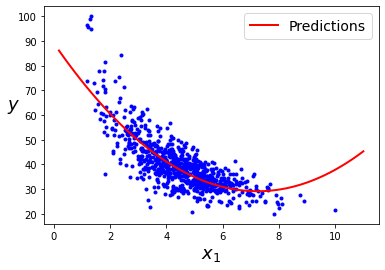

Error medio Absoluto (MAE): 4.59885465552002
Root Mean Squared Error: 6.253210308511435
r2_score 0.6527432592008644

**********Validation set**********


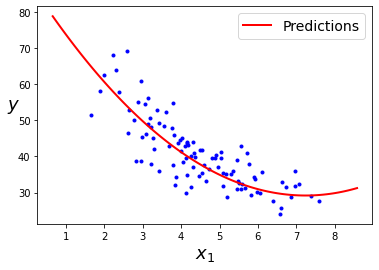

Error medio Absoluto (MAE): 4.182277553039216
Root Mean Squared Error: 5.390877677048845
r2_score 0.6763513837694715


In [122]:
# Train and evaluate a 2nd degree model
degree = 2
poly_reg = PolyFit(X_train, y_train, degree)
poly_reg.print_equation()
print('\n' + '*' * 10 + "Trainign set" + '*' * 10)
poly_reg.plotPrediction()
poly_reg.print_metrics()
print('\n' + '*' * 10 + "Validation set" + '*' * 10)
poly_reg.plotPrediction(X_val, y_val)
poly_reg.print_metrics(X_val, y_val)

###### 3rd order model

Equation:

$\hat{y} = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$

Equation: y_hat = 111.96 + -33.62 X^1 + 4.96 X^2 + -0.26 X^3

**********Trainign set**********


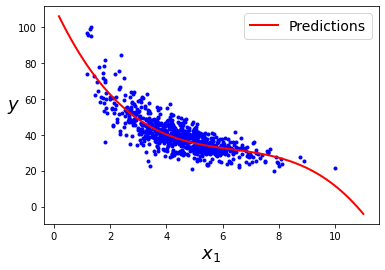

Error medio Absoluto (MAE): 4.5100752776590065
Root Mean Squared Error: 6.02619680374973
r2_score 0.677498873428832

**********Validation set**********


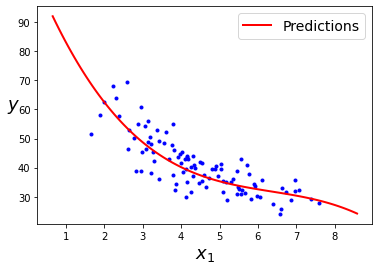

Error medio Absoluto (MAE): 4.2629608355337325
Root Mean Squared Error: 5.485397779973247
r2_score 0.6649026044663997


In [123]:
# Train and evaluate a 3rd degree model
degree = 3
poly_reg = PolyFit(X_train, y_train, degree)
poly_reg.print_equation()
print('\n' + '*' * 10 + "Trainign set" + '*' * 10)
poly_reg.plotPrediction()
poly_reg.print_metrics()
print('\n' + '*' * 10 + "Validation set" + '*' * 10)
poly_reg.plotPrediction(X_val, y_val)
poly_reg.print_metrics(X_val, y_val)

###### 4th order model

Equation:

$\hat{y} = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4$

Equation: y_hat = 136.20 + -58.72 X^1 + 13.64 X^2 + -1.48 X^3 + 0.06 X^4

**********Trainign set**********


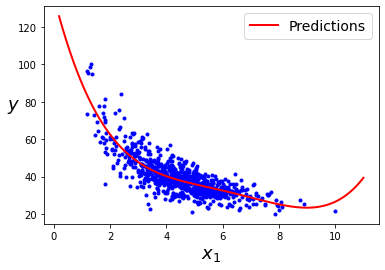

Error medio Absoluto (MAE): 4.4663887858345985
Root Mean Squared Error: 5.950976367885656
r2_score 0.6854996987541998

**********Validation set**********


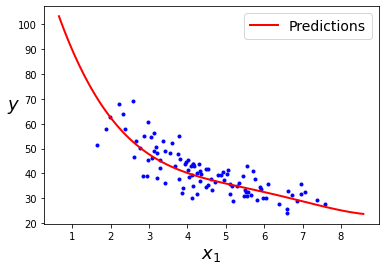

Error medio Absoluto (MAE): 4.337091303275591
Root Mean Squared Error: 5.596207897436697
r2_score 0.6512273030560729


In [124]:
# Train and evaluate a 4th degree model
degree = 4
poly_reg = PolyFit(X_train, y_train, degree)
poly_reg.print_equation()
print('\n' + '*' * 10 + "Trainign set" + '*' * 10)
poly_reg.plotPrediction()
poly_reg.print_metrics()
print('\n' + '*' * 10 + "Validation set" + '*' * 10)
poly_reg.plotPrediction(X_val, y_val)
poly_reg.print_metrics(X_val, y_val)

#### Conclusiones modelo polinomial

En este caso, a pesar de que las métricas y la $R^2$ van mejorando conforme aumentamos el grado de la regresión polinomial para el set de training; sin embargo, el mismo comportamiento no se observa sobre el set de validation, lo que nos estaría hablando de un overfitting notorio entre los modelos a partir del 2do grado. En este caso, un polinomio de grado 2 parece ser la mejor aproximación del modelo.

#### Lasso and Ridge regularizations

In [137]:
from sklearn.linear_model import Lasso, Ridge

class RegularizationFit(PolyFit):
  def __init__(self, X, y, degree, model):
    super().__init__(X, y, degree) # Same as before
    self.model = model # Update model and fit it with the data
    self._fit()

Equation: y_hat = 64.41 + -5.47 X^1 + -0.00 X^2

**********Trainign set**********


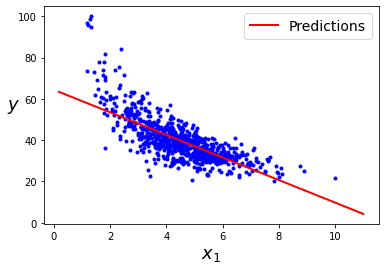

Error medio Absoluto (MAE): 4.90648577402427
Root Mean Squared Error: 7.009985133641719
r2_score 0.5636059622404205

**********Validation set**********


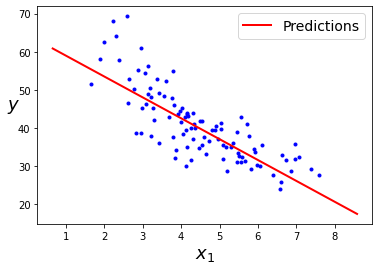

Error medio Absoluto (MAE): 4.453068165672188
Root Mean Squared Error: 5.740464688553903
r2_score 0.6330145050507627


In [153]:
# Train and evaluate with Lasso model
model = Lasso(alpha=1)
lasso_fit = RegularizationFit(X_train, y_train, 2, model)
lasso_fit.print_equation()
print('\n' + '*' * 10 + "Trainign set" + '*' * 10)
lasso_fit.plotPrediction()
lasso_fit.print_metrics()
print('\n' + '*' * 10 + "Validation set" + '*' * 10)
lasso_fit.plotPrediction(X_val, y_val)
lasso_fit.print_metrics(X_val, y_val)

Equation: y_hat = 88.61 + -16.31 X^1 + 1.12 X^2

**********Trainign set**********


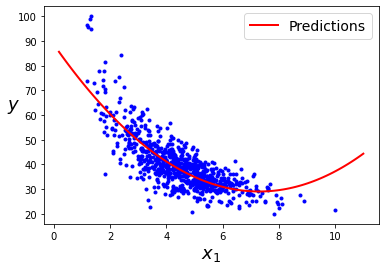

Error medio Absoluto (MAE): 4.593453206110691
Root Mean Squared Error: 6.253624293385659
r2_score 0.6526972784038814

**********Validation set**********


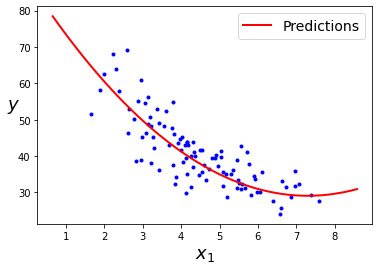

Error medio Absoluto (MAE): 4.175191740447853
Root Mean Squared Error: 5.385957520020391
r2_score 0.6769418907076439


In [154]:
# Train and evaluate with Ridge model
model = Ridge(alpha=1)
lasso_fit = RegularizationFit(X_train, y_train, 2, model)
lasso_fit.print_equation()
print('\n' + '*' * 10 + "Trainign set" + '*' * 10)
lasso_fit.plotPrediction()
lasso_fit.print_metrics()
print('\n' + '*' * 10 + "Validation set" + '*' * 10)
lasso_fit.plotPrediction(X_val, y_val)
lasso_fit.print_metrics(X_val, y_val)

#### Plot metrics

In [145]:
class RegularizationFitMetrics(RegularizationFit):
  def _predict(self, X=None):
    if type(X) == type(None):
      X = self.X
    X_poly = self._poly_features.fit_transform(X)
    return self.model.predict(X_poly)
  
  def _mae(self, X=None, y=None):
    if type(X) == type(None) or type(y) == type(None):
      y = self.y
      y_pred = self._predict()
    else:
      y_pred = self._predict(X)
    return metrics.mean_absolute_error(y, y_pred)
    
  def _rmse(self, X=None, y=None):
    if type(X) == type(None) or type(y) == type(None):
      y = self.y
      y_pred = self._predict()
    else:
      y_pred = self._predict(X)
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

  def _rsquared(self, X=None, y=None):
    if type(X) == type(None) or type(y) == type(None):
      y = self.y
      y_pred = self._predict()
    else:
      y_pred = self._predict(X)
    return r2_score(y, y_pred)

In [155]:
models = {
    "Linear": (LinearRegression(fit_intercept=True), 1),
    "Polinomial": (LinearRegression(fit_intercept=True), 2),
    "Lasso": (Lasso(alpha=1), 4),
    "Ridge": (Ridge(alpha=1), 4),
    }

train_metrics = {k: [] for k in ["MAE", "RMSE", "R2"]}
val_metrics = {k: [] for k in ["MAE", "RMSE", "R2"]}
for m, values in models.items():
  model_fit = RegularizationFitMetrics(X_train, y_train, values[1], values[0])
  train_metrics["MAE"].append(model_fit._mae())
  val_metrics["MAE"].append(model_fit._mae(X_val, y_val))
  train_metrics["RMSE"].append(model_fit._rmse())
  val_metrics["RMSE"].append(model_fit._rmse(X_val, y_val))
  train_metrics["R2"].append(model_fit._rsquared())
  val_metrics["R2"].append(model_fit._rsquared(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.049e+03, tolerance: 9.008e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [160]:
df_train = pd.DataFrame(train_metrics)
df_train["model"] = models.keys()

df_val = pd.DataFrame(val_metrics)
df_val["model"] = models.keys()

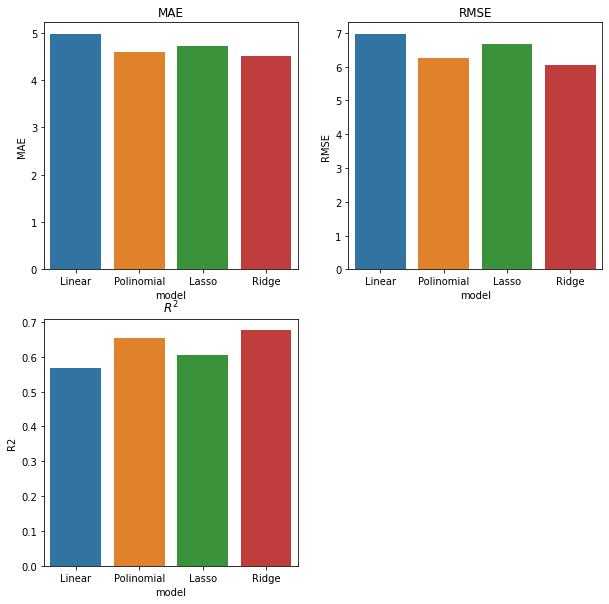

In [171]:
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.barplot(data=df_train, y="MAE", x="model")
plt.title("MAE")
plt.subplot(2, 2, 2)
sns.barplot(data=df_train, y="RMSE", x="model")
plt.title("RMSE")
plt.subplot(2, 2, 3)
sns.barplot(data=df_train, y="R2", x="model")
plt.title("$R^2$")
plt.show()

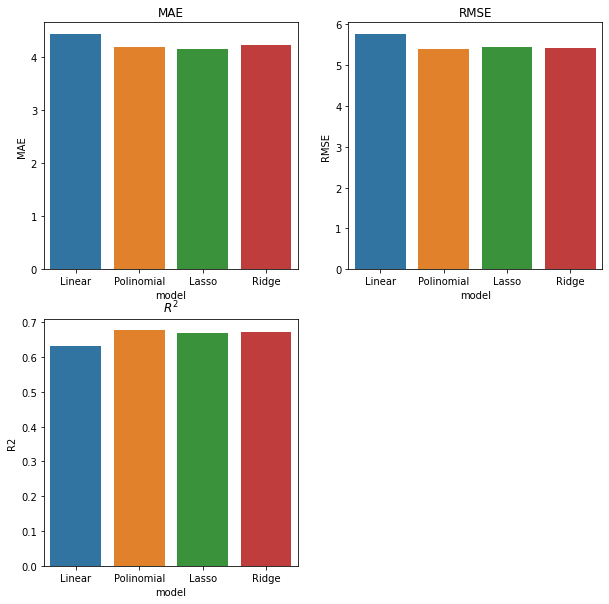

In [172]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.barplot(data=df_val, y="MAE", x="model")
plt.title("MAE")
plt.subplot(2, 2, 2)
sns.barplot(data=df_val, y="RMSE", x="model")
plt.title("RMSE")
plt.subplot(2, 2, 3)
sns.barplot(data=df_val, y="R2", x="model")
plt.title("$R^2$")
plt.show()

#### Conclusiones

Se puede observar que el mejor modleo es el de regularización Ridge, el cual minimiza los valores de las potencias mayores, por tanto es muy similar a un polinomial, aunque con mayor penzalización a aquellos que llevan a cabo un overfitting.

Se ocuparon 80% de los datos para entrenamiento, 10% para validación y el 10% restante como set de test. Los errores se despliegan en las celdas anteriores, donde se puede apreciar que en general tiene un rango de [4, 5] para el MAE y [5, 6] para el RMSE.

En este caso los modelos son buenos para describir el fenómeno, aunque no son excelentes, ya que apenas obtuvieron un $R^2$ cercana al 0.7 como máximo.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [173]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5826,1773101159,20150107T000000,250000.0,3,2.25,1050,572,2.0,0,0,...,7,740,310,2006,0,98106,47.5549,-122.363,1260,1062
19234,1324079029,20150317T000000,200000.0,3,1.00,960,213008,1.0,0,0,...,6,960,0,1933,0,98024,47.5621,-121.862,1520,57499
8642,9144100298,20150302T000000,380000.0,3,1.00,1260,7980,1.0,0,0,...,7,1260,0,1951,0,98177,47.7013,-122.373,1760,7606
5814,1922069071,20150424T000000,411000.0,4,1.75,2250,292288,1.0,0,0,...,7,2250,0,1963,0,98042,47.3787,-122.091,1550,23798
971,2009001600,20150506T000000,265000.0,3,1.00,1070,9000,1.0,0,0,...,7,1070,0,1950,0,98198,47.4061,-122.330,1840,12000
5331,3629930170,20140514T000000,723000.0,4,2.50,2700,4004,2.0,0,0,...,9,2700,0,2004,0,98029,47.5521,-121.995,2260,4459
8564,8645510230,20140529T000000,332000.0,3,2.25,2270,8876,1.0,0,0,...,7,1380,890,1977,0,98058,47.4653,-122.176,2150,7455
16547,526059259,20140819T000000,335500.0,3,1.75,1260,8487,1.0,0,0,...,7,1260,0,1970,0,98011,47.7664,-122.201,1890,13051
19682,2523039346,20150218T000000,720000.0,4,3.25,3276,10801,2.0,0,0,...,9,3276,0,2008,0,98166,47.4585,-122.361,2010,11656
15095,2141500020,20141217T000000,500000.0,4,2.50,2230,8560,2.0,0,0,...,8,2230,0,2002,0,98059,47.4877,-122.143,2400,7756


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [175]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [176]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


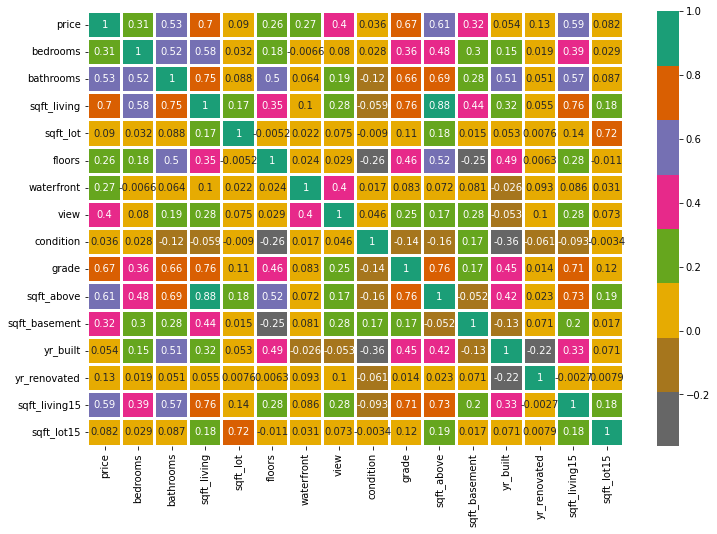

In [177]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [178]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [227]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = X_test.shape[0]/X_train.shape[0], random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Numero total de registros en el validation set: {len(X_val)}')
print(f'Tamaño de X_val: {X_val.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17289
Tamaño de X_train: (17289, 15)
**************************************************
Numero total de registros en el validation set: 2162
Tamaño de X_val: (2162, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


#### Entrenamiento de modelo lineal

In [222]:
class MultiplePolyFit(PolyFit):
  def print_equation(self):
    xs = self.X.shape[1]
    print(f"Equation: y_hat = {self.model.intercept_[0]:.2f} + {' + '.join([f'{self.model.coef_[0][i-1]:.2f} X_{i}' for i in range(1, xs)])}")

In [225]:
mult_reg = MultiplePolyFit(X_train, y_train, 1)
mult_reg.print_equation()
mult_reg.print_metrics()

Equation: y_hat = 6151359.26 + -38200.80 X_1 + 41466.14 X_2 + 107.99 X_3 + 0.02 X_4 + 31691.69 X_5 + 552691.02 X_6 + 41249.32 X_7 + 21222.14 X_8 + 119493.22 X_9 + 47.78 X_10 + 60.22 X_11 + -3550.90 X_12 + 13.26 X_13 + 29.01 X_14
Error medio Absoluto (MAE): 139269.3293911558
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833


#### Entrenamiento de todos los modelos

In [230]:
models = {
    "Linear": (LinearRegression(fit_intercept=True), 1),
    "Polinomial": (LinearRegression(fit_intercept=True), 2),
    "Lasso": (Lasso(alpha=1), 3),
    "Ridge": (Ridge(alpha=1), 3),
    }

train_metrics = {k: [] for k in ["MAE", "RMSE", "R2"]}
val_metrics = {k: [] for k in ["MAE", "RMSE", "R2"]}
for m, values in models.items():
  model_fit = RegularizationFitMetrics(X_train, y_train, values[1], values[0])
  print('\n' + '*' * 10 + f"Model: {m}" + '*' * 10)
  print(f"Equation:\nIntercept: {model_fit.model.intercept_}\nCoafficients: {model_fit.model.coef_}")
  train_metrics["MAE"].append(model_fit._mae())
  val_metrics["MAE"].append(model_fit._mae(X_val, y_val))
  train_metrics["RMSE"].append(model_fit._rmse())
  val_metrics["RMSE"].append(model_fit._rmse(X_val, y_val))
  train_metrics["R2"].append(model_fit._rsquared())
  val_metrics["R2"].append(model_fit._rsquared(X_val, y_val))


**********Model: Linear**********
Equation:
Intercept: [6159587.94109305]
Coafficients: [[-3.57373107e+04  4.27845316e+04  1.06081380e+02  2.65902735e-02
   3.39855389e+04  5.29118225e+05  4.19854721e+04  2.16698518e+04
   1.18374619e+05  4.44837228e+01  6.15976573e+01 -3.55863056e+03
   1.22398665e+01  3.31514595e+01 -4.97395267e-01]]

**********Model: Polinomial**********
Equation:
Intercept: [86209073.23026946]
Coafficients: [[ 9.02837933e+05 -9.29867061e+05  2.28550952e+03 -2.53625303e+01
  -2.43501332e+06 -3.75872210e+06 -3.71841692e+05  4.58272603e+05
   1.33459704e+06 -2.63554520e+03 -3.05745605e+03 -9.25952699e+04
  -3.09688811e+03  3.65778557e+03 -3.52888416e+01  9.24646836e+02
   6.51165498e+03 -7.55461418e+01 -9.16278798e-03  5.03872197e+03
  -1.10432902e+04  3.17080323e+02 -4.16464098e+03 -4.63619532e+03
   6.58117710e+01  4.90219344e+01 -4.55619966e+02 -8.74810299e+00
   1.52503586e+01  2.33716153e-01 -7.45727573e+03  5.43120521e+01
  -1.58521934e-01 -2.27756714e+04  8.22

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.588e+14, tolerance: 2.251e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive



**********Model: Lasso**********
Equation:
Intercept: [8123946.2271771]
Coafficients: [ 2.17595119e+05  1.18613687e+05  1.60817617e+02  9.58400655e-01
 -2.43885300e+05  6.63943798e+05  1.47601140e+05  2.26931307e+05
  1.40439719e+05 -9.04085157e+01 -2.39814456e+02 -5.96408545e+03
 -8.81914230e+01  2.09942655e+02 -1.23629780e+00 -3.29000834e+03
 -9.64784991e+03 -1.22653117e+01  2.44747434e-01  3.00222856e+04
 -1.59167521e+05 -2.26030768e+04 -1.98439137e+04 -1.35574403e+03
  2.18478214e+00  2.57160290e+01 -4.54780229e+01  3.83377954e+01
  1.91772621e+01  3.10939133e-01  5.66031768e+02  1.14984794e+01
 -1.79296956e-02 -1.41219696e+04 -3.51116793e+04  1.19984565e+04
  7.06224723e+03 -1.77094315e+03  3.49541265e+00 -4.65956746e-01
 -2.14756857e+01 -7.50656601e+01  6.26943849e+00  2.63475844e-01
 -6.85426444e-03 -4.66371504e-05  1.26564971e+01  7.95613801e+01
 -2.21836293e+01 -5.95738428e+00  6.21902591e+00 -1.05318128e-02
  7.51223034e-03 -1.01631112e-02  5.59816864e-02  7.41740350e-04
  1

In [233]:
df_train = pd.DataFrame(train_metrics)
df_train["model"] = models.keys()

df_val = pd.DataFrame(val_metrics)
df_val["model"] = models.keys()

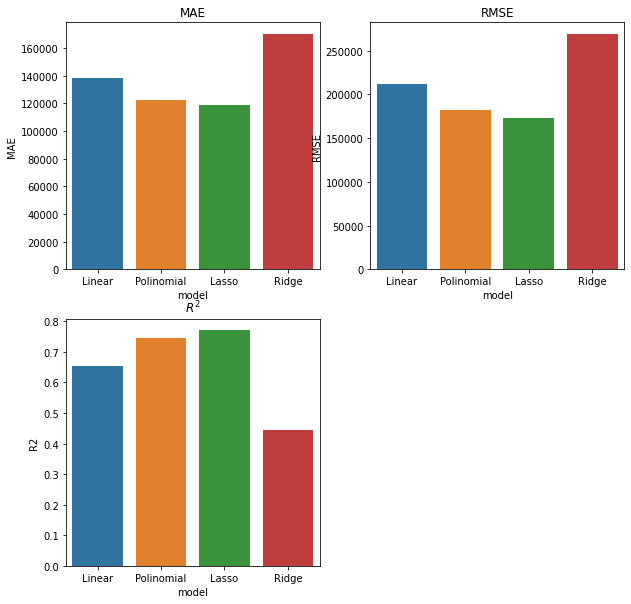

In [234]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.barplot(data=df_train, y="MAE", x="model")
plt.title("MAE")
plt.subplot(2, 2, 2)
sns.barplot(data=df_train, y="RMSE", x="model")
plt.title("RMSE")
plt.subplot(2, 2, 3)
sns.barplot(data=df_train, y="R2", x="model")
plt.title("$R^2$")
plt.show()

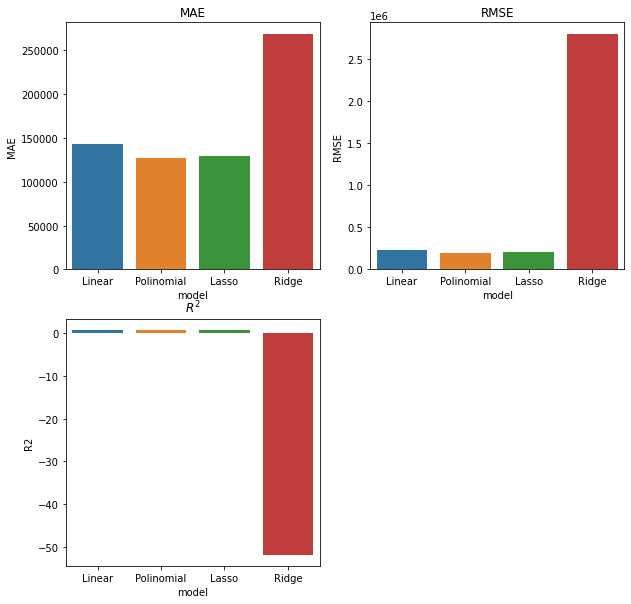

In [235]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.barplot(data=df_val, y="MAE", x="model")
plt.title("MAE")
plt.subplot(2, 2, 2)
sns.barplot(data=df_val, y="RMSE", x="model")
plt.title("RMSE")
plt.subplot(2, 2, 3)
sns.barplot(data=df_val, y="R2", x="model")
plt.title("$R^2$")
plt.show()

In [238]:
y.describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


#### Conclusiones:

En este caso es notorio que el mejor modelo es Lasso, en particular porque tiene la capacidad de reducir a cero completamente los factores que no tienen relevancia para la predicción, mientras que en los demás pueden generar ruido.

Se entrenó con 80% de train, 10% de validation y 10% de tests.

Se tiene un MAE de 250,000, lo que en el caso de los valores es reducido, ya que el rango de valores es de [75,000 hasta 7,700,000].

